Bimbo Group - Final Data Project

In [ ]:
# NOTES TO OPERATE:
# Open iPython Notebooks from DAT-NYC-39 File
# Command to select 1000 lines
# head -n 1000 my_data.csv > truncated_data.csv

In [38]:
ls

BimboBreads2.ipynb                 Untitled Folder/
BimboBreads_notebook1-Copy1.ipynb  Untitled.ipynb
BimboBreads_notebook1.ipynb        tree.dot
Datasets/                          tree.png


In [9]:
# IMPORT PACKAGES (SKLEARN, PANDAS, NUMPY, MATPLOTLIB)
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
#Import + rename Train data --> first 100000 out of 7.4 million
train_data = pd.read_csv('Datasets/train6.csv', low_memory=False)
train_data.columns = ['Week_number','Sales_Depot_ID','Sales_Channel_ID','Route_ID','Client_ID',
'Product_ID','Weekly_Sales_Units','Weekly_Sales', 'Returns_Units_Next_Week_Int',
'Returns_Units_Next_Week_Pesos','Adjusted_Demand']
train_data.head(10)

,Week_number,Sales_Depot_ID,Sales_Channel_ID,Route_ID,Client_ID,Product_ID,Weekly_Sales_Units,Weekly_Sales,Returns_Units_Next_Week_Int,Returns_Units_Next_Week_Pesos,Adjusted_Demand
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3
5,3,1110,7,3301,15766,1250,5,38.20,0,0.0,5
6,3,1110,7,3301,15766,1309,3,20.28,0,0.0,3
7,3,1110,7,3301,15766,3894,6,56.10,0,0.0,6
8,3,1110,7,3301,15766,4085,4,24.60,0,0.0,4
9,3,1110,7,3301,15766,5310,6,31.68,0,0.0,6


In [11]:
# SUMMARY STATISTICS FOR TRAIN DATASET:
train_data.describe()

,Week_number,Sales_Depot_ID,Sales_Channel_ID,Route_ID,Client_ID,Product_ID,Weekly_Sales_Units,Weekly_Sales,Returns_Units_Next_Week_Int,Returns_Units_Next_Week_Pesos,Adjusted_Demand
count,249999.0,249999.000000,249999.000000,249999.000000,2.499990e+05,249999.000000,249999.000000,249999.000000,249999.000000,249999.000000,249999.000000
mean,3.0,1113.220837,1.236277,1818.939180,1.189248e+06,17891.777299,8.177549,91.661976,0.157981,2.138289,8.057544
std,0.0,2.190887,1.152325,1061.816764,1.498956e+06,18157.093970,23.384452,382.960408,3.275152,36.584494,23.071855
min,3.0,1110.000000,1.000000,1.000000,3.967000e+03,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0,1111.000000,1.000000,1125.000000,9.963600e+04,1230.000000,2.000000,19.940000,0.000000,0.000000,2.000000
50%,3.0,1112.000000,1.000000,1456.000000,4.065970e+05,3919.000000,4.000000,37.400000,0.000000,0.000000,4.000000
75%,3.0,1116.000000,1.000000,2105.000000,1.762582e+06,35651.000000,8.000000,70.400000,0.000000,0.000000,8.000000
max,3.0,1117.000000,11.000000,4501.000000,9.747286e+06,49994.000000,2000.000000,21736.560000,1008.000000,9426.000000,2000.000000


In [12]:
# Examine Sales Depot Categorical Values
train_data['Sales_Depot_ID'].value_counts()

1116    75938
1111    67346
1112    52795
1113    30859
1110     8014
1117     7959
1114     7088
Name: Sales_Depot_ID, dtype: int64

In [13]:
# Examine Sales Channel Categorical Values
train_data['Sales_Channel_ID'].value_counts()

1     234621
2       7088
7       6931
11       662
8        421
4        276
Name: Sales_Channel_ID, dtype: int64

In [54]:
# Examine Route ID Categorical Values
# Outcome: Will drop route id bc there is no provided reference to supply chain path.

train_data.Route_ID.groupby(Route_ID).shape

NameError: name 'Route_ID' is not defined

In [15]:
# {}POTENTIALLY MOVE SOMEWHERE ELSE {}
# TRANSFORMING ADJUSTED DEMAND INTO CATEGORICAL VARIABLE
# train_data['Adjusted_Demand'] = train_data['Adjusted_Demand'].apply(lambda x: 8 if x > 7 else x)

In [16]:
a = table4['Client_Name'].str.contains('Walmart')

NameError: name 'table4' is not defined

In [17]:
#Import and Rename Client Table data --> all 935k
client_table = pd.read_csv('Datasets/cliente_tabla.csv', low_memory=False)
client_table.columns = ['Client_ID', 'Client_Name']
print client_table.head(100)

    Client_ID                               Client_Name
0           0                                SIN NOMBRE
1           1                          OXXO XINANTECATL
2           2                                SIN NOMBRE
3           3                                 EL MORENO
4           4   SDN SER  DE ALIM  CUERPO SA CIA  DE INT
5           4      SDN SER DE ALIM CUERPO SA CIA DE INT
6           5                                LA VAQUITA
7           6                                    LUPITA
8           7                              I M EL GUERO
9           8                      MINI SUPER LOS LUPES
10          9                 SUPER KOMPRAS MICRO COLON
11         10                   LONJA MERCANTIL DE TODO
12         11                 FARMACIA NICOLAS SAN JUAN
13         12                          PAPELERIA CATALA
14         13                                     ELENA
15         14                                CASA TRINO
16         15                  FMA035947 BIMBO S

In [18]:
# CODE FROM KERNEL: MAKE ALL STRING VALUES UPPER CASE
client_table['Client_Name'] = client_table['Client_Name'].str.upper()

In [19]:
# CODE FROM KERNEL: VALUE COUNTS ON FIRST 200 ROWS
client_table['Client_Name'].value_counts()[0:200]

NO IDENTIFICADO    281670
LUPITA               4863
MARY                 3016
LA PASADITA          2426
LA VENTANITA         2267
LA GUADALUPANA       1299
ROSY                 1246
ALEX                 1242
GABY                 1238
LA ESCONDIDA         1216
PATY                 1145
LA ESPERANZA         1139
HERNANDEZ            1129
LA CHIQUITA          1118
DANY                 1082
GARCIA               1062
JUQUILITA            1022
MARTINEZ              987
LA TIENDITA           914
3 HERMANOS            913
DIANA                 894
MI TIENDITA           881
SAN JOSE              851
LA PROVIDENCIA        842
GONZALEZ              826
DICONSA               823
LA ESQUINA            816
LUCY                  792
LETY                  776
GLORIA                714
                    ...  
LORENA                260
RUBI                  258
WENDY                 257
VICTORIA              257
TERESA                256
VERONICA              256
CECY                  253
LAS GEMELAS 

In [20]:
# TF-IDF Score List:
# Input: client_table (dataframe), list_len (?)
# Output: ?
def tfidf_score_list(client_table, list_len):
    # Import TfidfVectorizer function from sklearn.feature_extraction.text
    from sklearn.feature_extraction.text import TfidfVectorizer
    
    # v <- TfidfVectorizer 
    v = TfidfVectorizer()

    # "New" column erted into client_table (df)
    client_table['New'] = 'na'
    # Joins "Client Name" on empty df
    a = " ".join(client_table['Client_Name'])
    # Renames new column with values from  "Client Name" 
    client_table['New'][0] = a

    # TFIDF - Fit  Transform on client_table['New'] 
    tfidf = v.fit_transform(client_table['New'])

    # define feature names 
    feature_names = v.get_feature_names()

    
    # define freq as empty array
    freq = []
    # define object doc equal to 0.
    doc = 0
    #  define feature index as first row of TFIDT array
    # array has been sorted for nonzero ?? --> figure out shape of TFIDF array
    feature_index = tfidf[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf[doc, x] for x in feature_index])
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
            freq.append((w.encode('utf-8'),s))
    
    del client_table['New']
    
    import numpy as np
    names = ['word','score']
    formats = ['S50','f8']
    dtype = dict(names = names, formats=formats)
    array = np.array(freq, dtype=dtype)

    b = np.sort(array, order='score')
    
    if list_len > len(b)+1:
        list_len = len(b)+1
    for i in range(1,list_len):
        print(b[-i])

In [21]:
# PRINT TFIDF SCORE LIST:
tfidf_score_list(client_table, 200)

('no', 0.6888126004393861)
('identificado', 0.6849292193081505)
('la', 0.14990532034895288)
('el', 0.08328478631485127)
('abarrotes', 0.0800093233318993)
('de', 0.060769929775020375)
('maria', 0.046819424108208656)
('miscelanea', 0.038050812737366206)
('super', 0.03520332413080589)
('los', 0.02841652592336794)
('san', 0.025741686070920162)
('oxxo', 0.02257321668206611)
('del', 0.021668634477420134)
('garcia', 0.021376833766244014)
('hernandez', 0.02099506116912192)
('jose', 0.019835153342196838)
('lupita', 0.019261278610217134)
('gonzalez', 0.01775850494766011)
('martinez', 0.01764664800837593)
('lopez', 0.017150586799376526)
('mini', 0.015331695699712036)
('rodriguez', 0.014891562960354718)
('las', 0.01388971385198337)
('don', 0.012542567235386944)
('comodin', 0.01238450851683321)
('guadalupe', 0.012357760118308733)
('mary', 0.012270219904955897)
('jesus', 0.012024620973049328)
('ramirez', 0.011995440901931718)
('juan', 0.011966260830814104)
('casa', 0.011929785741917089)
('ag', 0.011

/Users/OldMacBook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
# PRINT ELEMENTS OF CLIENT_NAMES LIST THAT CONTAIN *CAFE*
print(client_table[client_table['Client_Name'].str.contains('.*CAFE.*')])

        Client_ID                           Client_Name
78           1438                 CAFETRIA PREPARATORIA
1095         5045         CAFETERIA DE LA SECUNDARIA 13
1098         5048                     CAFETERIA PREPA 2
1233         5416                             CAFETERIA
1318         5612        CAFETERIA NORMAL DE PROFESORES
1446         5908      CAFETERIA FACULTAD DE PSICOLOGIA
2005         7463                  CAFETERIA DE LA UAEM
2150         7922                       ICATI CAFETERIA
2306         8317         CAFETERIA FACULTAD DE DERECHO
2308         8319  CAFETERIA FACULTAD DE ADMINISTRACION
2573         8979                             CAFETERIA
2864         9956                               LA CAFE
3147        10753                  CAFETERIA LA CARRETA
3207        10844                  CAFETERIA EL JUBILEO
3209        10846                  CAFETERIA LA CENTRAL
3240        10913                  CAFETERIA DON ARTURO
3243        10918                     CAFETERIA 

In [23]:
# FILTER CLIENT NAME VALUES

def filter_specific(vf2):
    client_table['Client_Name'] = client_table['Client_Name'].str.replace('.*REMISION.*','Consignment')
    client_table['Client_Name'] = client_table['Client_Name'].replace(['.*WAL MART.*','.*SAMS CLUB.*'],'Walmart', regex=True)
    client_table['Client_Name'] = client_table['Client_Name'].str.replace('.*OXXO.*','Oxxo Store')
    client_table['Client_Name'] = client_table['Client_Name'].str.replace('.*CONASUPO.*','Govt Store')
    client_table['Client_Name'] = client_table['Client_Name'].str.replace('.*BIMBO.*','Bimbo Store')
    client_table['Client_Name'] = client_table['Client_Name'].replace(['.*COLEG.*','.*UNIV.*','.*ESCU.*','.*INSTI.*',\
                                                        '.*PREPAR.*'],'School', regex=True)
    client_table['Client_Name'] = client_table['Client_Name'].str.replace('.*PUESTO.*','Post')
    client_table['Client_Name'] = client_table['Client_Name'].replace(['.*FARMA.*','.*HOSPITAL.*','.*CLINI.*'],'Hospital/Pharmacy', regex=True)
    client_table['Client_Name'] = client_table['Client_Name'].replace(['.*CAFE.*','.*CREMERIA.*','.*DULCERIA.*',\
                                                        '.*REST.*','.*BURGER.*','.*TACO.*', '.*TORTA.*',\
                                                        '.*TAQUER.*','.*HOT DOG.*',\
                                                        '.*COMEDOR.*', '.*ERIA.*','.*BURGU.*'],'Eatery', regex=True)
    client_table['Client_Name'] = client_table['Client_Name'].str.replace('.*SUPER.*','Supermarket')
    client_table['Client_Name'] = client_table['Client_Name'].replace(['.*COMERCIAL.*','.*BODEGA.*','.*DEPOSITO.*',\
                                                            '.*ABARROTES.*','.*MERCADO.*','.*CAMBIO.*',\
                                                        '.*MARKET.*','.*MART .*','.*MINI .*',\
                                                        '.*PLAZA.*','.*MISC.*','.*ELEVEN.*','.*EXP.*',\
                                                         '.*SNACK.*', '.*PAPELERIA.*', '.*CARNICERIA.*',\
                                                         '.*LOCAL.*','.*COMODIN.*','.*PROVIDENCIA.*'
                                                        ],'General Market/Mart'\
                                                       , regex=True)
    client_table['Client_Name'] = client_table['Client_Name'].replace(['.*VERDU.*','.*FRUT.*'],'Fresh Market', regex=True)
    client_table['Client_Name'] = client_table['Client_Name'].replace(['.*HOTEL.*','.*MOTEL.*'],'Hotel', regex=True)

In [24]:
# CALL FILTER_SPECIFIC FUNCTION
filter_specific(client_table)

In [25]:
# --- Begin filtering for more general terms
# The idea here is to look for names with particles of speech that would
# not appear in a person's name.
# i.e. "Individuals" should not contain any participles or numbers in their names.
def filter_participle(client_table):
    client_table['Client_Name'] = client_table['Client_Name'].replace([
            '.*LA .*','.*EL .*','.*DE .*','.*LOS .*','.*DEL .*','.*Y .*', '.*SAN .*', '.*SANTA .*',\
            '.*AG .*','.*LAS .*','.*MI .*','.*MA .*', '.*II.*', '.*[0-9]+.*'\
    ],'Small Franchise', regex=True)

In [26]:
# CALL FILTER_PARTICIPLE FUNCTION
filter_participle(client_table)

In [27]:
# Any remaining entries should be "Individual" Named Clients, there are some outliers.
# More specific filters could be used in order to reduce the percentage of outliers in this final set.
def filter_remaining(client_table):
    def function_word(data):
        # Avoid the single-words created so far by checking for upper-case
        if (data.isupper()) and (data != "NO IDENTIFICADO"): 
            return 'Individual'
        else:
            return data
    client_table['Client_Name'] = client_table['Client_Name'].map(function_word)

In [28]:
# CALL FILTER_REMAINING FUNCTION
filter_remaining(client_table)

In [29]:
# CALL VALUE COUNTS ON CLIENT NAME COLUMN
client_table['Client_Name'].value_counts()

Individual             353145
NO IDENTIFICADO        281670
Small Franchise        160501
General Market/Mart     66416
Eatery                  30419
Supermarket             16019
Oxxo Store               9313
Hospital/Pharmacy        5798
School                   5705
Post                     2667
Hotel                    1127
Fresh Market             1069
Govt Store                959
Bimbo Store               320
Walmart                   220
Consignment                14
Name: Client_Name, dtype: int64

In [39]:
client_table.to_csv("/Users/OldMacBook/Desktop/School/General Assembly/DataScience/DAT-NYC-39/dataProject/Datasets/Client_Table_Filtered.csv", index=False)

In [30]:
#Import Product Table --> 2.6k
product_table = pd.read_csv('Datasets/producto_tabla.csv', low_memory=False)
product_table.columns = ['Product_ID', 'Product_Name']
product_table.count()

Product_ID      2592
Product_Name    2592
dtype: int64

In [57]:
#Import Town_State table --> all
town_state = pd.read_csv('Datasets/town_state.csv', low_memory=False)

town_state.rename(columns = {'Agencia_ID':'Sales_Depot_ID'}, inplace=True)
print town_state.head(100)

    Sales_Depot_ID                                   Town             State
0             1110                     2008 AG. LAGO FILT      MÉXICO, D.F.
1             1111                  2002 AG. AZCAPOTZALCO      MÉXICO, D.F.
2             1112                    2004 AG. CUAUTITLAN  ESTADO DE MÉXICO
3             1113                     2008 AG. LAGO FILT      MÉXICO, D.F.
4             1114                   2029 AG.IZTAPALAPA 2      MÉXICO, D.F.
5             1116                   2011 AG. SAN ANTONIO      MÉXICO, D.F.
6             1117                      2001 AG. ATIZAPAN  ESTADO DE MÉXICO
7             1118                      2007 AG. LA VILLA      MÉXICO, D.F.
8             1119                2013 AG. MEGA NAUCALPAN  ESTADO DE MÉXICO
9             1120                  2018 AG. TEPALCATES 2      MÉXICO, D.F.
10            1121                   2016 AG. SAN LORENZO      MÉXICO, D.F.
11            1122                      2019 AG. XALOSTOC  ESTADO DE MÉXICO
12          

In [59]:
#Table1: Merge train with client
table1 = pd.merge(train_data, client_table, how = 'inner', on='Client_ID')

In [65]:
Depot_ID = pd.get_dummies(table1.Sales_Depot_ID, prefix='Depot')

In [68]:
#Table2: Merge table1 with product
table2 = pd.merge(table1, product_table, how='inner', on='Product_ID')

In [61]:
#Table3: Merge table2
table3 = pd.merge(table2, town_state, how='inner', on='Sales_Depot_ID')

In [62]:
#Table4 and Binarizing State Column
state = pd.get_dummies(table4.State, prefix='State')

state.columns = ['State_Mexico','State_Mexico_City']
table4 = table3.join(state[['State_Mexico','State_Mexico_City']])

In [63]:
# Table5 and Binarizing Client Names Column 
client_type = pd.get_dummies(table4.Client_Name)
table5 = table4.join(client_type)

In [69]:
table6 = table5.join(Depot_ID)

In [40]:
train_data.count()

Week_number                      249999
Sales_Depot_ID                   249999
Sales_Channel_ID                 249999
Route_ID                         249999
Client_ID                        249999
Product_ID                       249999
Weekly_Sales_Units               249999
Weekly_Sales                     249999
Returns_Units_Next_Week_Int      249999
Returns_Units_Next_Week_Pesos    249999
Adjusted_Demand                  249999
dtype: int64

In [55]:
table5.count()

Week_number                      251192
Sales_Depot_ID                   251192
Sales_Channel_ID                 251192
Route_ID                         251192
Client_ID                        251192
Product_ID                       251192
Weekly_Sales_Units               251192
Weekly_Sales                     251192
Returns_Units_Next_Week_Int      251192
Returns_Units_Next_Week_Pesos    251192
Adjusted_Demand                  251192
Client_Name                      251192
Product_Name                     251192
Town                             251192
State                            251192
State_Mexico                     251192
State_Mexico_City                251192
Bimbo Store                      251192
Eatery                           251192
Fresh Market                     251192
General Market/Mart              251192
Govt Store                       251192
Hospital/Pharmacy                251192
Hotel                            251192
Individual                       251192


In [ ]:
tabl

In [37]:
X = table5[['Weekly_Sales_Units', 'State_Mexico_City', 'Bimbo Store', 'Eatery', 'Fresh Market', \
        'General Market/Mart', 'Govt Store', 'Hospital/Pharmacy', 'Hotel', 'Individual', 'NO IDENTIFICADO', \
       'Oxxo Store','Post', 'School', 'Small Franchise', 'Supermarket', 'Walmart']]

In [70]:
# Move Table 5 to CSV
table6.to_csv("/Users/OldMacBook/Desktop/School/General Assembly/DataScience/DAT-NYC-39/dataProject/Datasets/Bimbo_Table.csv", index=False)

In [50]:
table5["Sales_Channel_ID"].value_counts()

1     92125
7      7107
11      662
8       426
Name: Sales_Channel_ID, dtype: int64

In [56]:
table5["Route_ID"].value_counts()

1415    6677
1401    6520
1412    6449
1404    6231
1414    6218
1453    6119
1413    6114
1201    6104
1606    6079
1420    6060
1402    5914
1460    5878
1458    5758
1403    5751
1605    5738
1603    5682
1419    5660
1421    5596
1408    5572
1461    5477
1456    5441
1001    5385
1407    5370
1457    5202
1214    5193
1452    5144
1418    5123
1405    5121
1454    5102
1417    5101
        ... 
42        73
31        70
18        68
47        68
45        67
7         67
113       67
48        66
51        66
73        59
69        58
49        56
23        56
17        56
128       55
61        53
72        45
46        45
71        44
3406      44
74        43
5         34
16        24
25        24
44        24
125       22
19        19
75        19
3407      13
600        4
Name: Route_ID, dtype: int64

In [47]:
table5['Client_Name'].value_counts()

Individual             100005
Small Franchise         77937
NO IDENTIFICADO         30873
General Market/Mart     18956
Eatery                   7447
Supermarket              7351
Post                     3699
Hospital/Pharmacy        2471
Walmart                   990
School                    497
Fresh Market              371
Govt Store                219
Hotel                     185
Bimbo Store               107
Oxxo Store                 84
Name: Client_Name, dtype: int64

In [9]:
# Imaport POST GRES SQL Server
from sqlalchemy import create_engine
engine = create_engine('postgresql://:@localhost:5432/OldMacbook')
table4.to_sql('table_name', engine)


NameError: name 'table4' is not defined

In [57]:
table5["Product_Name"].value_counts()

Pan Blanco 640g BIM 2233                          34496
Nito 1p 62g BIM 1278                              34471
Donas Azucar 4p 105g BIM 1250                     33934
Mantecadas Vainilla 4p 125g BIM 1240              31643
Madalenas 3p 93g BIM 35651                        29534
Donitas Espolvoreadas 6p 105g BIM 1242            29094
Pan Blanco Chico 360g BIM 1109                    28244
Panque Nuez 255g BIM 1232                         27969
Tortillinas 10p 255g TR 1125                      27092
Pan Integral 675g BIM 1146                        27004
Panquecito Gota Choc 2p 140g BIM 1238             26095
Rebanada 2p 55g BIM 1284                          25771
Colchones 6p 130g BIM 1220                        25419
Bimbunuelos 4p 66g BIM 1309                       20995
Roles Canela 2p 120g BIM 1212                     20543
Medias Noches 8p 340g BIM 1150                    20370
Roles Canela 6p 365g BIM 972                      19687
Tortillinas 20p 510g TR 1129                    

In [20]:
# GROUP BY Format


table4[(table4.Product_Name==1212)].groupby(["Client_ID","Product_ID"]).mean()

,,Week_number,Sales_Depot_ID,Sales_Channel_ID,Route_ID,Weekly_Sales_Units,Weekly_Sales,Returns_Units_Next_Week_Int,Returns_Units_Next_Week_Pesos,Adjusted_Demand,State_Mexico,State_Mexico_City
Client_ID,Product_ID,,,,,,,,,,,
3967,1212,3.0,1117.0,1.0,1449.0,2.0,16.76,0.0,0.0,2.0,1.0,0.0
13630,1212,3.0,1126.0,1.0,1414.0,5.0,41.90,0.0,0.0,5.0,1.0,0.0
13771,1212,3.0,1121.0,1.0,1416.0,2.0,16.76,0.0,0.0,2.0,0.0,1.0
13813,1212,3.0,1121.0,1.0,1418.0,1.0,8.38,0.0,0.0,1.0,0.0,1.0
14075,1212,3.0,1111.0,1.0,1419.0,4.0,33.52,0.0,0.0,4.0,0.0,1.0
15766,1212,3.0,1110.0,7.0,3301.0,3.0,25.14,0.0,0.0,3.0,0.0,1.0
15831,1212,3.0,1117.0,1.0,1280.0,2.0,16.76,0.0,0.0,2.0,1.0,0.0
16012,1212,3.0,1117.0,1.0,1281.0,2.0,16.76,0.0,0.0,2.0,1.0,0.0
16081,1212,3.0,1113.0,1.0,1402.0,7.0,58.66,0.0,0.0,7.0,0.0,1.0


In [43]:
returnsByState = table3.groupby(['State'])
returnsByState.tail(10)

,Week_number,Sales_Depot_ID,Sales_Channel_ID,Route_ID,Client_ID,Product_ID,Weekly_Sales_Units,Weekly_Sales,Returns_Units_Next_Week_Int,Returns_Units_Next_Week_Pesos,Adjusted_Demand,Client_Name,Product_Name,Town,State
990562,3,1130,1,1010,324435,42110,0,0.00,2,19.2,0,TOMAS LOPEZ,Tortillinas 10p 255g Prom TR 42110,2010 AG. LOS REYES,ESTADO DE MÉXICO
990563,3,1130,1,1012,593616,42110,0,0.00,6,57.6,0,GONZALEZ,Tortillinas 10p 255g Prom TR 42110,2010 AG. LOS REYES,ESTADO DE MÉXICO
990564,3,1130,1,1016,330878,42110,0,0.00,1,9.6,0,LA CHIQUITA,Tortillinas 10p 255g Prom TR 42110,2010 AG. LOS REYES,ESTADO DE MÉXICO
990565,3,1130,1,1021,933414,42110,0,0.00,1,9.6,0,MINGOS,Tortillinas 10p 255g Prom TR 42110,2010 AG. LOS REYES,ESTADO DE MÉXICO
990566,3,1130,1,1021,1206525,42110,0,0.00,2,19.2,0,CARMELITA,Tortillinas 10p 255g Prom TR 42110,2010 AG. LOS REYES,ESTADO DE MÉXICO
990567,3,1130,1,1026,330687,42110,0,0.00,2,19.2,0,ROSY,Tortillinas 10p 255g Prom TR 42110,2010 AG. LOS REYES,ESTADO DE MÉXICO
990568,3,1130,1,1026,331051,42110,0,0.00,1,9.6,0,TEXCOCO,Tortillinas 10p 255g Prom TR 42110,2010 AG. LOS REYES,ESTADO DE MÉXICO
990569,3,1130,1,1026,337177,42110,0,0.00,3,28.8,0,CARMELITA,Tortillinas 10p 255g Prom TR 42110,2010 AG. LOS REYES,ESTADO DE MÉXICO
990570,3,1130,1,1032,967621,42110,0,0.00,1,9.6,0,EL PUESTECITO,Tortillinas 10p 255g Prom TR 42110,2010 AG. LOS REYES,ESTADO DE MÉXICO
990571,3,1130,1,1032,4686864,42110,0,0.00,1,9.6,0,NO IDENTIFICADO,Tortillinas 10p 255g Prom TR 42110,2010 AG. LOS REYES,ESTADO DE MÉXICO


In [46]:
table5['Adjusted_Demand'][0:1000].describe()

count    1000.000000
mean        4.682000
std         2.486576
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max         8.000000
Name: Adjusted_Demand, dtype: float64

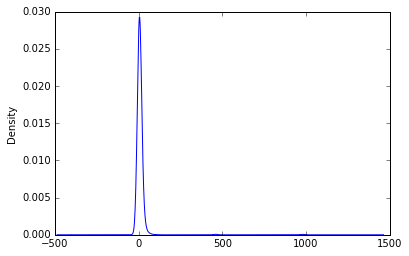

In [46]:
table3['Adjusted_Demand'][0:1000].plot(kind='density')

In [ ]:
table3.plot(kind='scatter', x='')

In [30]:
table3['State'].value_counts().head(100)

ESTADO DE MÉXICO    550839
MÉXICO, D.F.        454275
Name: State, dtype: int64

In [51]:
table5['Sales_Depot_ID'].value_counts().head(30)

1111    67440
1112    24685
1110     8195
Name: Sales_Depot_ID, dtype: int64